<a href="https://colab.research.google.com/github/csolutn/ML/blob/main/Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 선형회귀
![image.png](http://epsilondelt4.dothome.co.kr/img/lin.png)
# 다항회귀
![image-2.png](http://epsilondelt4.dothome.co.kr/img/quad.png)

# 특성공학 (Features Engineering)
기존 속성으로 부터 새로운 속성을 뽑아내어 입력 속성에 추가하는 작업
* '농어 길이' ---> 농어 길이' $^2$ , '농어길이'$^3$
* '농어 길이', '농어 높이' ---> '농어 길이 x 농어 높이'
* 다른 예?


다항 속성 추가 : 사이킷런 PolyFeatures() 변환기 사용

## 사이킷런의 변환기(transformer) 클래스
* sklearn.preprocessing 라이브러리에 포함
* .fit() : 변환 준비 (데이터 구조 파악)
* .tarnsform() : 변환 실행
* 변환기 PolynomialFeatures 매개 변수
    * include_bias
    * degree*

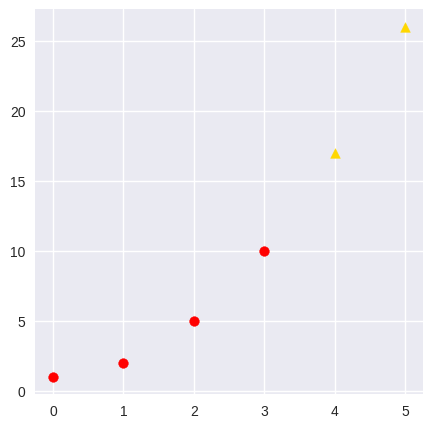

In [ ]:
data_x = np.arange(0, 4) #[0, 1, 2, 3]
data_y = data_x**2+1 #[0, 2, 5, 10]

test_x = [4, 5]
test_y = [17, 26]

data_x = data_x.reshape(-1,1)
data_y = data_y.reshape(-1,1)

plt.scatter(data_x, data_y, c = 'red')
plt.scatter([4], [17], marker='^', c = 'gold')
plt.scatter([5], [26], marker='^', c = 'gold')
plt.show()

In [ ]:
# 기존 방법
poly_x = np.column_stack((data_x, data_x**2))

print('선형회귀의 input  [[x]]')
print(data_x)
print('\n 다항회귀의 input  [[x, x**2]]')
print(poly_x)

선형회귀의 input  [[x]]
[[0]
 [1]
 [2]
 [3]]

 다항회귀의 input  [[x, x**2]]
[[0 0]
 [1 1]
 [2 4]
 [3 9]]


In [ ]:
# x^2을 속성에 포함하도록 전처리 (자료형태 예[2] -> [2, 4])
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit(data_x) # 변환준비 (데이터의 속성 파악)
poly_x = poly.transform(data_x) #변환

print(poly_x)

[[1. 0. 0.]
 [1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


In [ ]:
# PolynomiaFeatures로 전처리한 다항회귀 결과 확인

lr = LinearRegression()
lr.fit(poly_x, data_y)

a, b, c = *lr.coef_, lr.intercept_
print("y = {:.2f}x**2 +{:.2f}x+{:.2f}".format(b, a, c))

x = np.arange(0, 6, 0.1)
y = b*x**2 + a*x + c

plt.plot(x, y)
plt.scatter(data_x, data_y, c = 'red')
plt.scatter([4], [17], marker='^', c = 'gold')
plt.scatter([5], [26], marker='^', c = 'gold')
plt.show()

In [ ]:
# 추정해보기 : 다항특성(Polynomial Features) 실행 예제

from sklearn.preprocessing import PolynomialFeatures

input = [[2, 3],
         [4, 5]]

print('1. 기본 변환 (degree = 2, include_bias = True)')
poly = PolynomialFeatures()
poly.fit(input)
poly_output = poly.transform(input)
print(poly_output)

print('\n 2. include_bias 변경 : False')
poly_f = PolynomialFeatures(include_bias = False)
poly_f.fit(input)
poly_f_output = poly_f.transform(input)
print(poly_f_output)

print('\n 3. degree 변경 : 3, include_bias = False')
poly_3_f = PolynomialFeatures(degree=3, include_bias=False)
poly_3_f.fit(input)
poly_3_f_output = poly_3_f.transform(input)
print(poly_3_f_output)


# 2개 이상의 속성을 입력하여 근사하는 방법?
![fish.png](http://epsilondelt4.dothome.co.kr/img/fish.png)

# 다중회귀

* 여러 개의 특성을 사용한 선형회귀
![feat.png](http://epsilondelt4.dothome.co.kr/img/feat.png)

* 다중-다항 회귀

![feat.png](http://epsilondelt4.dothome.co.kr/img/curve.png)

# 농어 무게 추정 문제
* 입력 속성 : 길이, 높이, 두께
* 다항 속성 (2차) :
* [1, 2, 3] ---->

$L( x_{i1}, x_{i2}, \cdots, x_{i9}) =  \beta_0 + \beta_1 x_{i1} + \cdots + \beta_9 x_{i9}  = \sum_{j=0}^{9} \beta_j x_{ij}$


$ \rm{minRSS} = \rm{min} \{ \sum_{i = 1} ^ n({y_i} - L(
  {x_i}))^2 \}$


## 데이터 준비 : 판다스 pandas
* 데이터 분석 라이브러리
* 핵심구조 데이터프레임(dataframe)
* csv 파일을 간단하게 읽을 수 있는 메소드 제공
![](img/readcsv.png)

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
df[:10]

In [ ]:
# 타깃 데이터 준비 (http://bit.ly/perch_data)

import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
1000.0])

In [ ]:
# 훈련 세트와 테스트 세트로 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    df, perch_weight, random_state = 42
)

In [ ]:
# 다항 특성 추가

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
print(train_poly[0])

In [ ]:
test_poly = poly.transform(test_input)

In [ ]:
# 다중 회귀 모델 훈련하기

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

In [ ]:
print(lr.score(test_poly, test_target))

In [ ]:
# 특성 개수에 따른 과대적합 문제

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

In [ ]:
print(lr.score(test_poly, test_target))

# 규제 (regularization)

* 과대적합되지 않도록 계수(기울기)의 크기를 작게 만드는 일
![reg.png](http://epsilondelt4.dothome.co.kr/img/reg.png)

$ \rm{RSS}(잔차제곱합) =   \sum_{i = 1} ^ n(y_i - (\beta_0 + \beta_1x_{i1}+ \beta_2x_{i2}))^2 $


$\phantom{RSS(잔차제곱합)}= A\beta_1^2 + B\beta_1\beta_2 + C\beta_2^2 + D\beta_1 +E\beta_2 +F$

* 기하학적 의미 : RSS를 최소화 하는데 제한 조건(범위)을 거는 것
    * 예1 : $ \beta_1 ^2 + \beta_2 ^2 < r^2 $ (릿지)
    * 예2 : $ |\beta_1 | + |\beta_2 | < r $ (라쏘)
* 대수적 풀이
    * 예1 : $\rm{min} \[ RSS + \lambda(\beta_1 ^2 + \beta_2 ^2)\]$ (릿지)
    * 예2 : $\rm{min} \[ RSS + \lambda(|\beta_1 | + |\beta_2 |)\]$ (라쏘)

![lssrg.img](http://epsilondelt4.dothome.co.kr/img/lssrg.png)

In [ ]:
# 공정한 제어를 위해 정규화

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
# 릿지 회귀

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

In [ ]:
print(ridge.score(test_scaled, test_target))

# Ridge 규제 강도의 설정 : alpha 값
* Ridge 클래스의 매개변수로 사전에 지정해야하는 **하이퍼파라미터**
* alpha 가 커질수록 규제가 커짐
* 방법 : alpha 에 대한 R $^2$값의 그래프를 관찰 --> train과 test 점수가 가장 가까워지는 alpha값 추출

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []


alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 각 alpha값에 따른 릿지 객체 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))


In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

In [ ]:
# (추가) 미세 최적화

train_score = []
test_score = []
alpha_list = np.arange(0.01, 0.2, 0.01)

print(alpha_list)

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show

In [ ]:
ridge = Ridge(alpha = 0.03)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

In [ ]:
# 라쏘회귀

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 각 alpha값에 따른 라쏘 모델 설정
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))